### importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### loading dataset

In [19]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                       skiprows = 1, header = None)

In [20]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
              'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
              'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [21]:
train_set.columns = col_labels
test_set.columns = col_labels

In [22]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### For easy preprocessing let us Joining train & test Datasets.

In [25]:
df = pd.concat([train_set,test_set])

In [26]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
df.shape

(48842, 15)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [31]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [38]:
print(df['workclass'].nunique())
df['workclass'].value_counts()

9


 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [39]:
df.replace(' ?',np.nan,inplace=True)

In [40]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
dtype: int64

In [41]:
df['wage_class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [42]:
df = df.replace({' <=50K':0, ' >50K':1, ' <=50K.':0, ' >50K.':1})

In [43]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### EDA

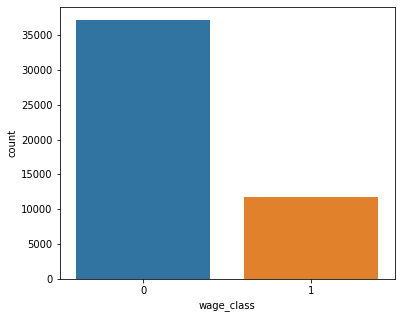

In [62]:
plt.figure(figsize=(6,5))
sns.countplot(df['wage_class'])

In [67]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Never-worked'], dtype=object)

In [65]:
df= df.replace(' Without-pay', ' Never-worked')

In [66]:
df.workclass.value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Never-worked           31
Name: workclass, dtype: int64

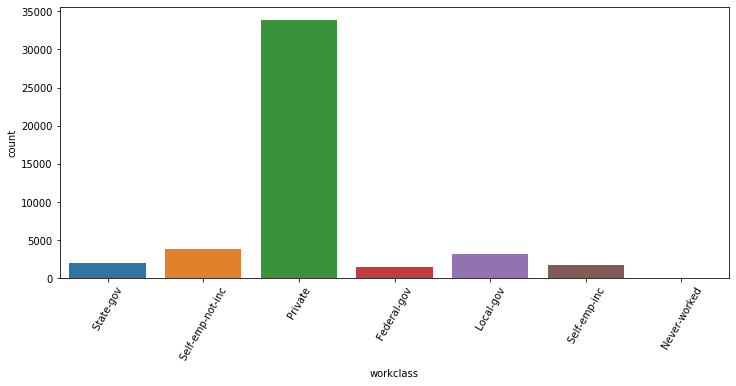

In [69]:
plt.figure(figsize=(12,5))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

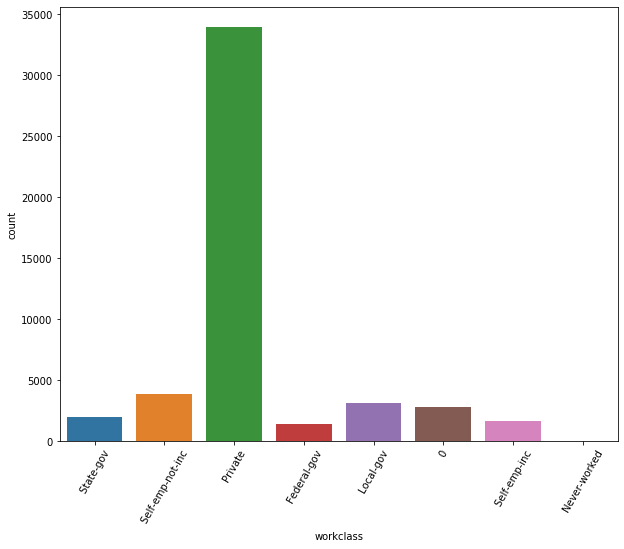

In [70]:
df['workclass'].fillna('0',inplace=True)

plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [71]:
df['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [72]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

In [73]:
df['fnlwgt'].describe()

count    48842.000000
mean        11.982958
std          0.630817
min          9.416216
25%         11.674632
50%         12.090356
75%         12.378525
max         14.214556
Name: fnlwgt, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

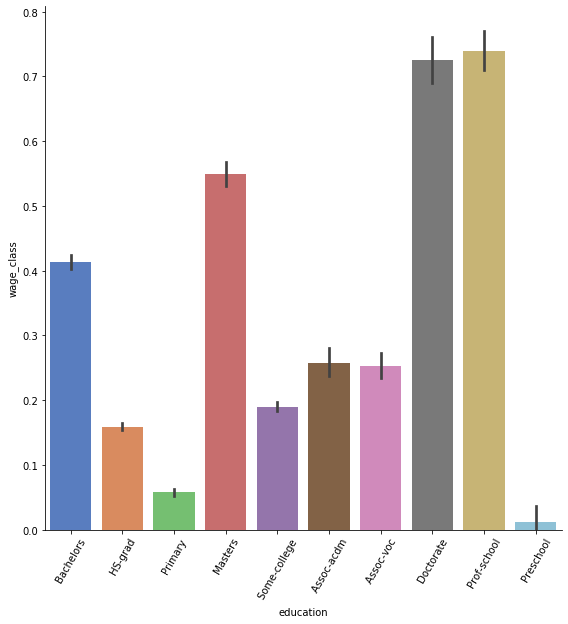

In [85]:
sns.catplot(x='education',y='wage_class',data=df,height=8,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [81]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [82]:
df['education'] = df['education'].apply(primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

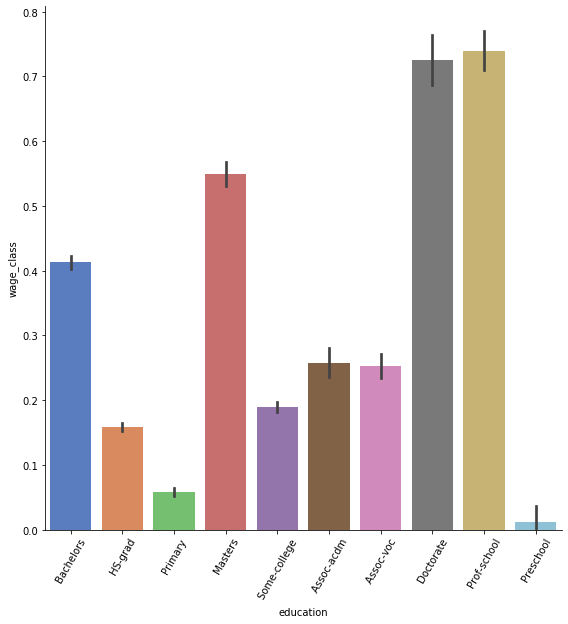

In [84]:
sns.catplot(x='education',y='wage_class',data=df,height=8,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [87]:
df['marital_status'].value_counts()

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name: marital_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

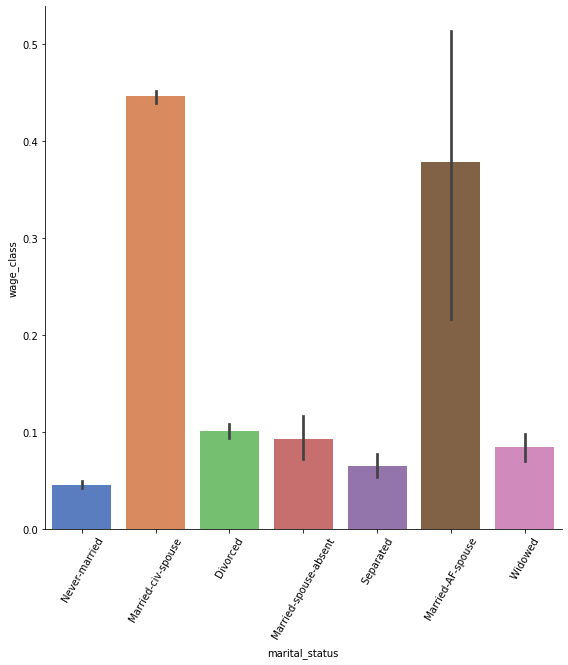

In [88]:
sns.catplot(x='marital_status',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

In [89]:
df['occupation'].fillna('0',inplace=True)

In [90]:
df['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
0                     2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [91]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

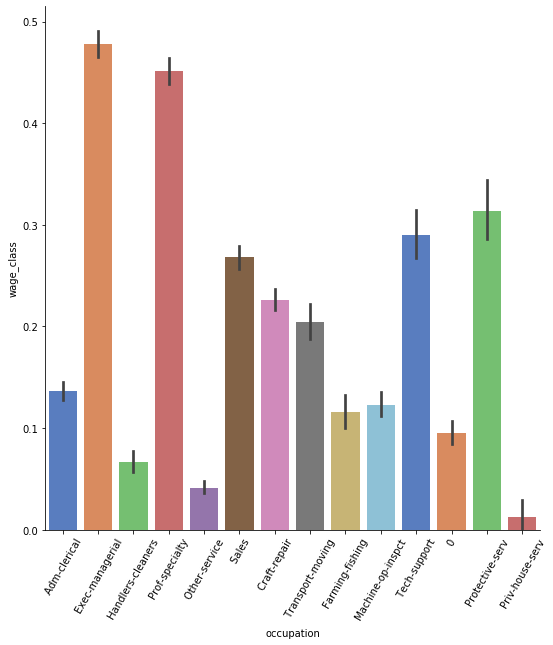

In [92]:
sns.catplot(x='occupation',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

In [95]:
df['native_country'].value_counts()

 United-States                 43832
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

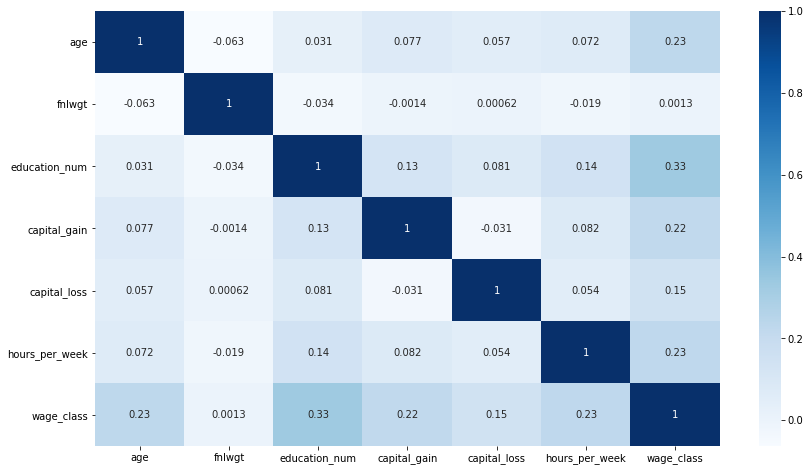

In [101]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap = 'Blues')

In [102]:
X = df.drop(['wage_class'],axis=1)
y = df['wage_class']

In [103]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [104]:
X_d = pd.get_dummies(X)

In [105]:
X_d.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,12.281398,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,12.366157,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,12.732013,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_d)

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=101)

## Applying GridSearchCV

In [108]:
params = [{ 'learning_rate':[0.01,0.001],
           'max_depth': [3,5,10],
           'n_estimators':[10,50,100,200]}]

In [109]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
Xbc = XGBClassifier()
Gcv = GridSearchCV(Xbc,params,scoring='accuracy',cv=5,n_jobs=3,verbose=3)
Gcv.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  8.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [110]:
Gcv.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

In [111]:
XBC = XGBClassifier(learning_rate=0.01,max_depth=10,n_estimators=200)
XBC.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Evaluating Model

In [112]:
XBC.score(x_test,y_test)

0.8661025046065652

In [113]:
y_pred = XBC.predict(x_test)

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [115]:
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)}')
print('*'*50)
print(f'Confusion Matrix:{confusion_matrix(y_test,y_pred)}')
print('*'*50)
print(f'Classification Report: {classification_report(y_test,y_pred)}')

Accuracy Score:0.8661025046065652
**************************************************
Confusion Matrix:[[10532   568]
 [ 1394  2159]]
**************************************************
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91     11100
           1       0.79      0.61      0.69      3553

    accuracy                           0.87     14653
   macro avg       0.84      0.78      0.80     14653
weighted avg       0.86      0.87      0.86     14653



In [117]:
import pickle
# Writing different model files to file
with open( 'XGBOOSTmodelForPrediction.sav', 'wb') as f:
    pickle.dump(XBC,f)